# Bit Bikes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Hier laad ik de datasets in 

In [2]:
data_2020 = pd.read_csv('202007-divvy-tripdata.csv')
data_2021 = pd.read_csv('202107-divvy-tripdata.csv')
data_2022 = pd.read_csv('202207-divvy-tripdata.csv')
data_2020.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,09/07/2020 15:22,09/07/2020 15:25,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,24/07/2020 23:56,25/07/2020 00:20,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,08/07/2020 19:49,08/07/2020 19:56,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,17/07/2020 19:06,17/07/2020 19:27,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,04/07/2020 10:39,04/07/2020 10:45,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


## Hier maak het dataset schoon
Ik haal hier de colums weg die ik niet nodig heb voor deze visiulisatie.

In [3]:
clean_data_2020 = data_2020 [['rideable_type','member_casual']]
clean_data_2021 = data_2021 [['rideable_type','member_casual']]
clean_data_2022 = data_2022 [['rideable_type','member_casual']]

## Combineer de datasets
Hier combineer ik de datasets om ze naast elkaar te verlijken voor een beter overzicht.

In [4]:
combined_data = pd.concat([clean_data_2020.assign(Year=2020), clean_data_2021.assign(Year=2021), clean_data_2022.assign(Year=2022)])
combined_data

,rideable_type,member_casual,Year
0,docked_bike,member,2020
1,docked_bike,member,2020
2,docked_bike,casual,2020
3,docked_bike,casual,2020
4,docked_bike,member,2020
...,...,...,...
823483,electric_bike,member,2022
823484,electric_bike,member,2022
823485,electric_bike,member,2022
823486,electric_bike,member,2022


## Vergelijken
Hier plot ik de grafieken om te kunnen vergelijken van het aantal fietsen en members.

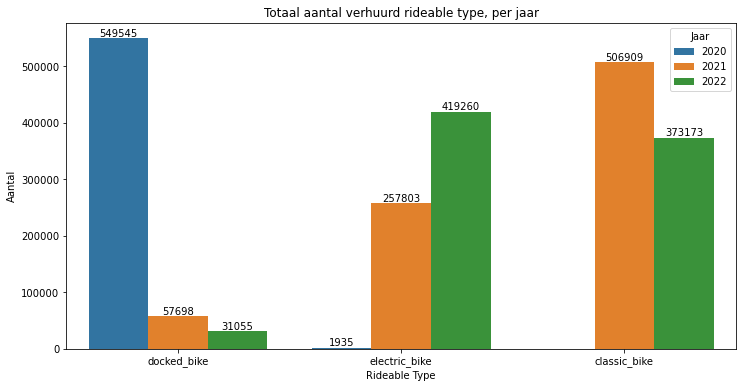

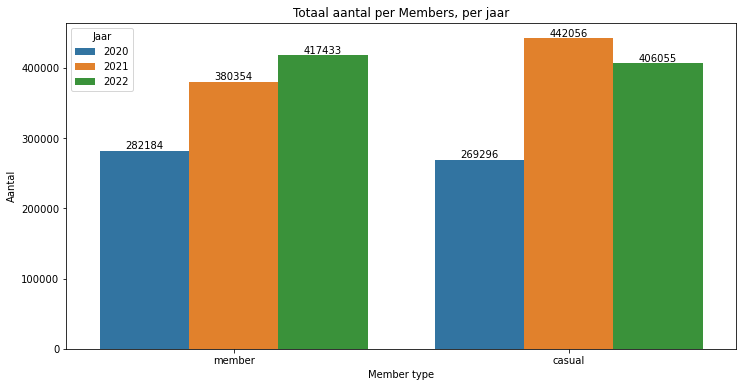

In [5]:
# Countplot van 'rideable_type' per jaar
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='rideable_type', data=combined_data, hue='Year')

# Voegt de waarden toe boven op elke staaf per jaar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot instellingen
plt.xlabel('Rideable Type')
plt.ylabel('Aantal')
plt.title('Totaal aantal verhuurd rideable type, per jaar')
plt.xticks(rotation=0)

# legenda Labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['2020', '2021', '2022'], title='Jaar')

# Toon de plot
plt.show()

# Maak een countplot van 'casual_member' per jaar
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='member_casual', data=combined_data, hue='Year')

# Voegt de waarden toe boven op elke staaf per jaar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot instellingen
plt.xlabel('Member type')
plt.ylabel('Aantal')
plt.title('Totaal aantal per Members, per jaar')
plt.xticks(rotation=0)

# legenda Jaar
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['2020', '2021', '2022'], title='Jaar')

# Toon de plot
plt.show()


# Advies voor Bit Bikes
Dit advies onderbouw ik met het aan aangeleverde data, en wat ik er uit heb kunnen halen.

## Fietstypes
1. Docked bikes, zoals we kunnen zien neemt dit tpye fiets drastisch af in populariteit. In 2020 was dit type 549.545 keer verhuurd en in 2021 maar 57.698 keer het is met 89,46% afgenomen, en de vergelijking met 2021 tot 2022 is ook 46,04% afgenomen. Dus ik raad aan om dit type helemaal af te schaffen en alle docked bikes te verkopen. 

2. Electric bikes, van het grafiek is af te lezen dat deze type razend populair is.In 2020 was dit type 1935 keer verhuurd en in 2021 257.803 keer het is met 13.239,1% toegenomen, en zoals we kunnen zien dat het erg goed doet van 2021 naar 2022 is het met 62,64% gestegen. Dus ik raad voor dit type om meer fietsen te kopen minimaal 50% extra fietsen.

3. Clasic bikes, dit type fiets was populair toen het in 2021 werd toegevoegd. Maar in 2022 nam het aantal gebruiks wel af, wel liefst met 26,38%. Ik zou aanraden om deze clasic bike met 10% te verminderen.

## Members
1. Members Als we naar het aantal gebruikers kijken zien we dat vaste klanten positief stijgen per jaar, dat is een goed teken dus van een stabiele inkomsten bron. Van 2020 naar 2021 zijn de members toegenomen met 34,79%, en van 2021 naar 2022 is het met 9,74% gestegen. Het gemiddelde stijging van het afgelopen 3 jaar was ongeveer 22,355%, dus ik verwacht het aankomend jaar weer een positieve groei.

2. Casual Als we naar de cijfers kijken was er van 2020 naar 2021 een posetivie groei van 64,11%, maar van 2021 naar 2022 was er een afname van 8,15%. Dus het gemiddelde groeipercentage tussen 2020, 2021 en 2022 is ongeveer 27.98%, ik verwacht aankomend jaar weer een afname want ik verwacht dat mensen gaan overstappen naar een membership.